# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

### 1. The common procedure to set up a model:

In [11]:
geo_model = gp.create_model('Tutorial_ch1-7_Single_layer_topo')

gp.init_data(geo_model, extent=[450000, 460000, 70000,80000,-1000,500],resolution = (50,50,50),
                         path_i = os.pardir+"/data/input_data/tut-ch1-7/onelayer_interfaces.csv",
                         path_o = os.pardir+"/data/input_data/tut-ch1-7/onelayer_orient.csv")



Active grids: ['regular']


Tutorial_ch1-7_Single_layer_topo  2019-08-14 15:49

In [12]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Basement,1,True,#88cc60,2


In [13]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


### 2. Adding topography

#### 2.b create fun topography

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 4.50100000e+05,  7.01000000e+04, -9.85000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.55000000e+02],
       [ 4.50100000e+05,  7.01000000e+04, -9.25000000e+02],
       ...,
       [ 4.59500000e+05,  7.99000000e+04,  1.14937672e+02],
       [ 4.59700000e+05,  7.99000000e+04,  1.03546642e+02],
       [ 4.59900000e+05,  7.99000000e+04,  9.87334715e+01]])

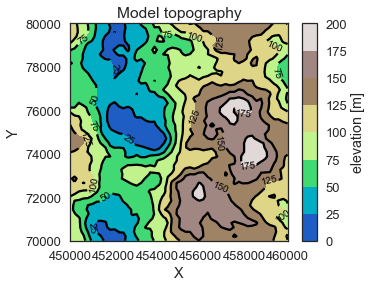

In [14]:
geo_model.set_topography(d_z=np.array([0,200]))

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


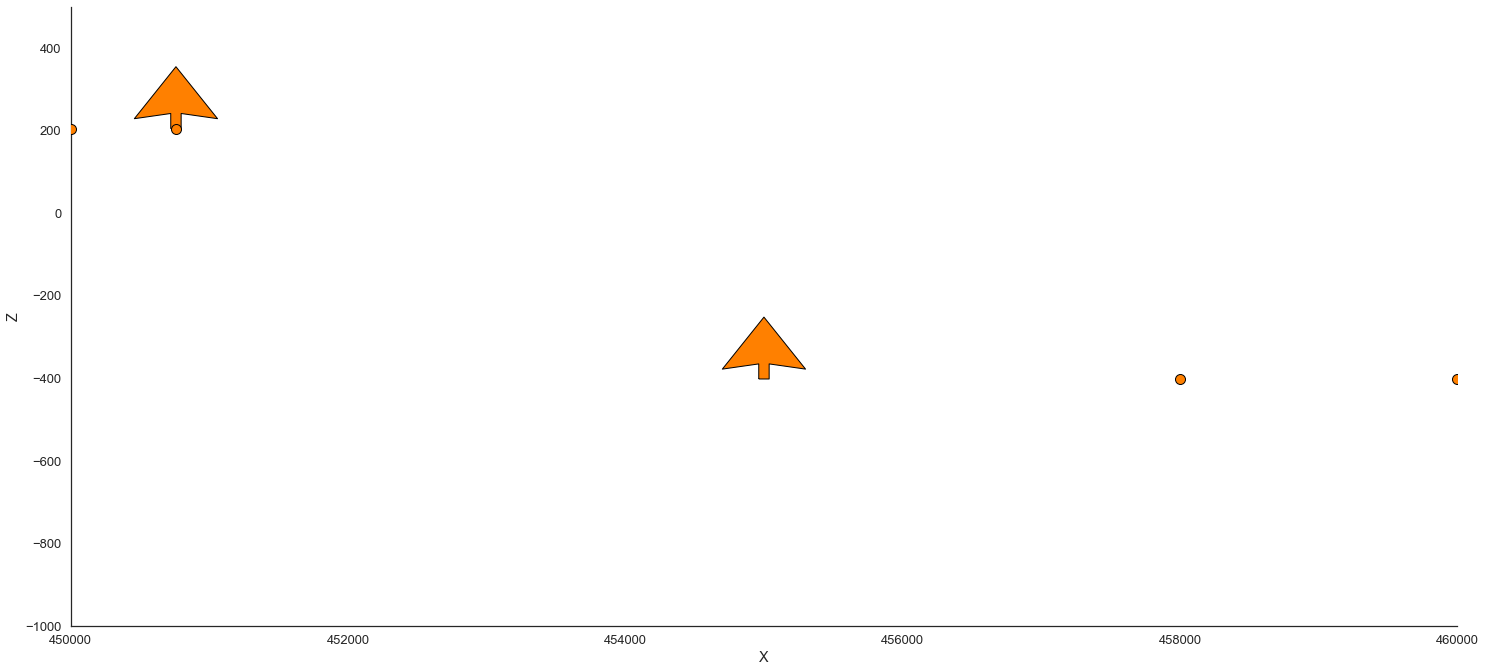

In [15]:
gp.plot.plot_data(geo_model)

#### 2 a. Load from raster file

In [7]:
fp = os.pardir+"/data/input_data/tut-ch1-7/bogota.tif"

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 4.40724090e+05,  6.92840900e+04, -1.95500000e+02],
       [ 4.40724090e+05,  6.92840900e+04, -1.86500000e+02],
       [ 4.40724090e+05,  6.92840900e+04, -1.77500000e+02],
       ...,
       [ 4.41108550e+05,  6.96849100e+04,  2.12923728e+02],
       [ 4.41116730e+05,  6.96849100e+04,  2.14380208e+02],
       [ 4.41124910e+05,  6.96849100e+04,  2.16759058e+02]])

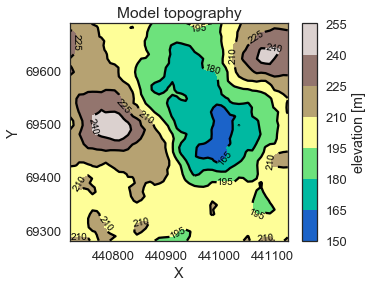

In [8]:
geo_model.set_topography()

In [9]:
vtkp = gp.plot.plot_3D(geo_model)

ImportError: vtk is not installed. No vtk capabilities are possible

In [10]:
vtkp.resume()

NameError: name 'vtkp' is not defined

In [9]:
geo_model.grid.topography.load_from_gdal(filepath=fp)

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...


[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...


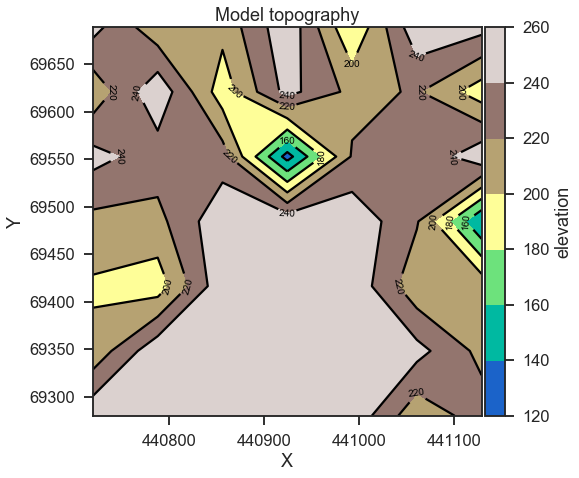

In [10]:
geo_model.set_topography(source='gdal',filepath=fp)

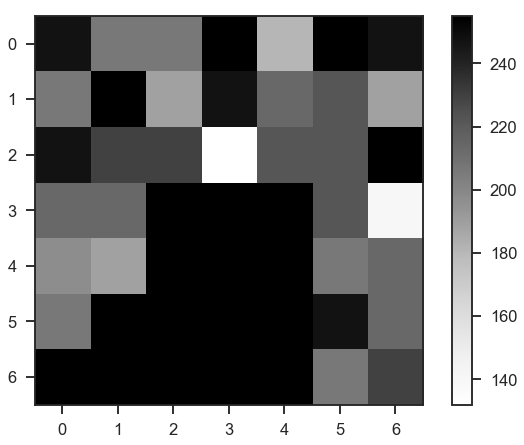

In [11]:
plt.imshow(geo_model.grid.topography.topo.dem_zval)
plt.colorbar()

In [12]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [13]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [14]:
vtkp = gp.plot.plot_3D(geo_model)

holding... Use vtk.resume to go back to the interactive window


In [15]:
vtkp.set_real_time_on()

In [16]:
vtkp.update_model()

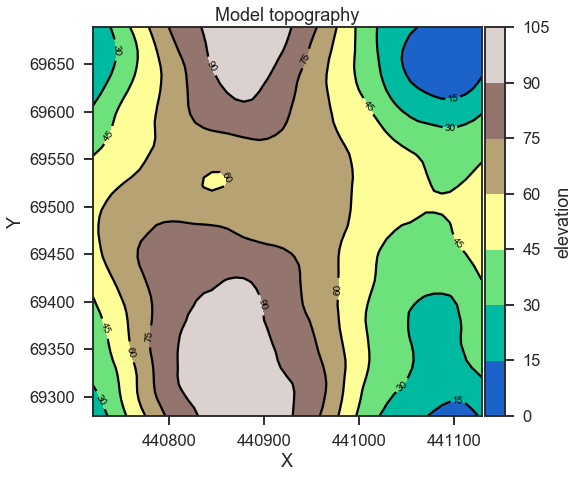

In [17]:
geo_model.set_topography(d_z=np.array([0,100]), fd=0.9, plot_object= vtkp)

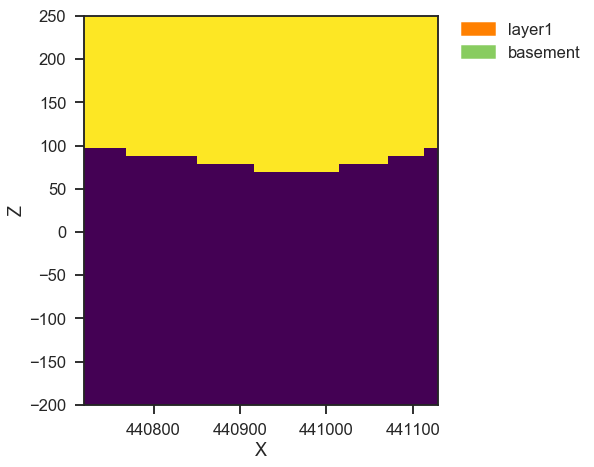

In [18]:
gp.plot.plot_section(geo_model, 25, direction='y', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=False)

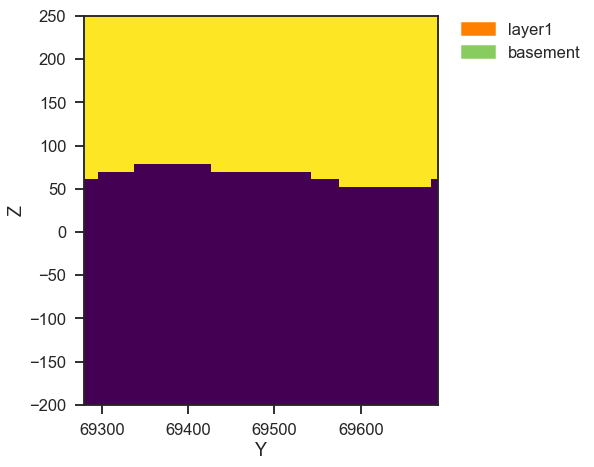

In [19]:
gp.plot.plot_section(geo_model, 25, direction='x', block=geo_model.grid.regular_grid.mask_topo,
                show_topo=False)
